In [ ]:
# link data
# https://www.kaggle.com/datasets/shivam2503/diamonds

### import

In [ ]:
!pip install seaborn==0.9.0

In [ ]:
from google.colab import output
import numpy as np
from numpy import arange
from matplotlib import pyplot
import pandas as pd
import re
from pandas import read_csv
from pandas import set_option
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
output.clear()

### prepare and handel data

**Mục tiêu: phân tích các yếu tố ảnh hưởng và cách xác định giá của một viên kim cương**

* price: price in US dollars(326--18,823)

* carat: weight of the diamond (0.2--5.01)

* cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)

* color: diamond colour, from J (worst) to D (best)

* clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

* x: length in mm (0--10.74)

* y: width in mm (0--58.9)

* z: depth in mm (0--31.8)

* depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

* table: width of top of diamond relative to widest point (43--95)

**Load data**

In [ ]:
data = pd.read_csv('/content/diamonds.csv')

**Phân tích sơ lược**

In [ ]:
data.shape

(53940, 11)

In [ ]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [ ]:
data.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


* min của x, y, z bằng 0, điều này là không thực tế
* max của y là 58.9 trong khi mean khoảng 5.7 và max của x là 10.74 -> xuất hiện điều bất thường
* max của z là 31.8 trong khi mean khoảng 3.5, tương tự như y
* Có cột không cần thiết là Unnamed

**loại bỏ các giá trị của x,y,z có min = 0**

In [ ]:
# drop
data = data.drop(data[data["x"]==0].index)
data = data.drop(data[data["y"]==0].index)
data = data.drop(data[data["z"]==0].index)
data.shape

(53920, 11)

**Kiểm tra các giá trị bất thường của y và z**

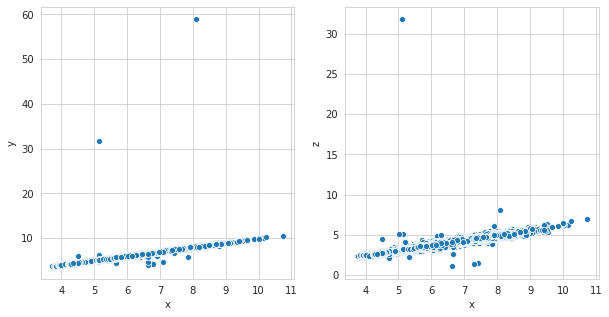

In [ ]:
#scatterplot x & y,z
figure, ax = plt.subplots(ncols=2, figsize=(10,5))
sns.scatterplot(x='x', y='y', data=data, ax=ax[0])
sns.scatterplot(x='x', y='z', data=data, ax=ax[1])

plt.show()

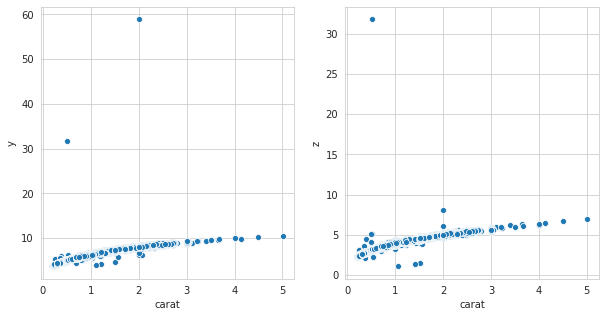

In [ ]:
#scatterplot carat & y,z
figure, ax = plt.subplots(ncols=2, figsize=(10,5))
sns.scatterplot(x='carat', y='y', data=data, ax=ax[0])
sns.scatterplot(x='carat', y='z', data=data, ax=ax[1])

plt.show()

In [ ]:
# kiểm tra ngoại lệ
data[(data.y > 10) | (data.z > 10)]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
24067,24068,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.90,8.06
25998,25999,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17
27415,27416,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98
27630,27631,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72
48410,48411,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,31.80
49189,49190,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.80,5.12


* Chỉ có 3 dòng có giá trị trên 11, đây là những ngoại lệ và do chiếm số lượng ít so với data nên để đơn giản, ta sẽ loại bỏ nó

In [ ]:
#drop
data = data.drop(data[data.y > 11].index)
data = data.drop(data[data.z > 11].index)
data.shape

(53917, 11)

**Loại bỏ cột Unnamed**

In [ ]:
data.drop(['Unnamed: 0'],inplace = True, axis = 1)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Kiểm tra giá trị null**

In [ ]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

**Kiểm tra lại sau khi xử lí data**

In [ ]:
data.describe()

,carat,depth,table,price,x,y,z
count,53917.000000,53917.000000,53917.000000,53917.000000,53917.000000,53917.000000,53917.000000
mean,0.797687,61.749565,57.456939,3930.910474,5.731605,5.733428,3.539409
std,0.473777,1.432318,2.234069,3987.215003,1.119402,1.111272,0.691620
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,10.540000,6.980000


**Kiểm tra các categories**

In [ ]:
data.describe(include='object')

,cut,color,clarity
count,53917,53917,53917
unique,5,7,8
top,Ideal,G,SI1
freq,21547,11284,13063


In [ ]:
object_columns = data.select_dtypes(include='object').columns

for col in object_columns:
    print('-'*50)
    print(col, ':', '\n\n', ',  '.join(data[col].unique()), '\n')

--------------------------------------------------
cut : 

 Ideal,  Premium,  Good,  Very Good,  Fair 

--------------------------------------------------
color : 

 E,  I,  J,  H,  F,  G,  D 

--------------------------------------------------
clarity : 

 SI2,  SI1,  VS1,  VS2,  VVS2,  VVS1,  I1,  IF 



### explore categories

**Định nghĩa lại các biến categories**

In [ ]:
cut_dtype = pd.api.types.CategoricalDtype(
    categories=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], 
    ordered=True)
data['cut'] = data.cut.astype(cut_dtype)

color_dtype = pd.api.types.CategoricalDtype(
    categories=['J', 'I', 'H', 'G', 'F', 'E', 'D'], 
    ordered=True)
data['color'] = data.color.astype(color_dtype)

clar_dtype = pd.api.types.CategoricalDtype(
    categories=['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'], 
    ordered=True)
data['clarity'] = data.clarity.astype(clar_dtype)

**Xem tần số xuất hiện của các biến**

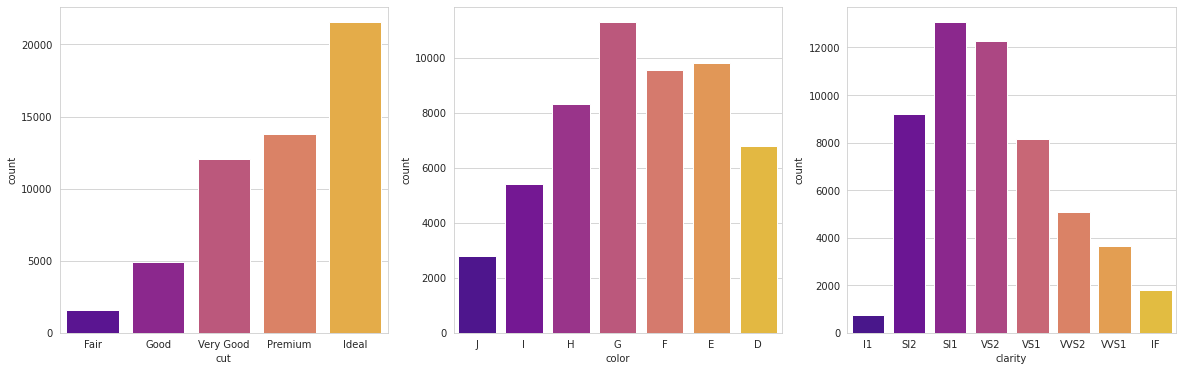

In [ ]:
#countplot 'cut', 'color', 'clarity'
figure, ax = plt.subplots(ncols=3, figsize=(20, 6))
cates = ['cut', 'color', 'clarity']
for i in range(len(ax)):
    sns.countplot(data[cates[i]], palette='plasma', ax=ax[i])
plt.show()

* Số viên kim cương tăng dần theo chất lượng cut
* color có phân bố ngẫu nhiên, chủ yếu thuộc màu H, G, F, E
* clarity có dạng phân phối chuẩn bị lệch phải

**cut and price**

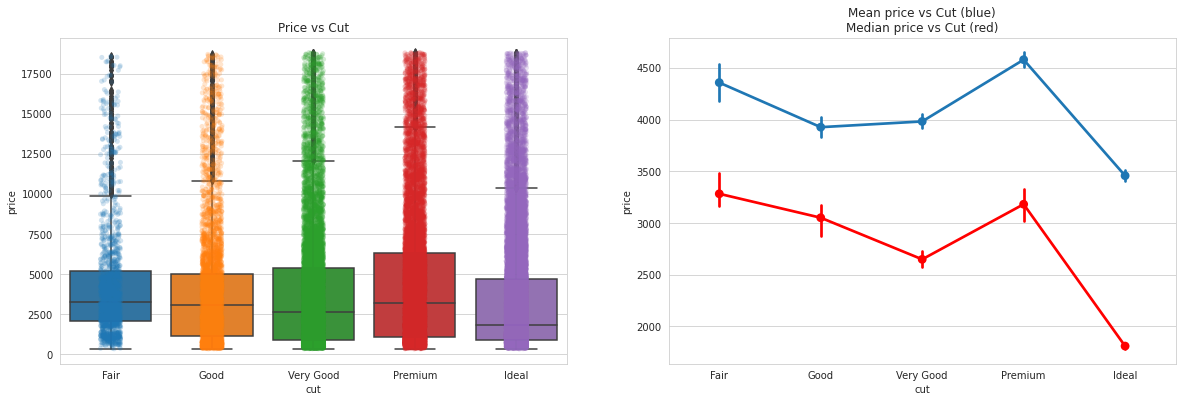

In [ ]:
# boxplot, stripplot, pointplot cut và price
figure, ax = plt.subplots(ncols=2, figsize=(20, 6))
sns.boxplot(data=data, x='cut', y='price', ax=ax[0])
sns.stripplot(data=data, x='cut', y='price', size=5, alpha=0.2, ax=ax[0])
sns.pointplot(data=data, x='cut', y='price', ax=ax[1])
sns.pointplot(data=data, x='cut', y='price', ax=ax[1], estimator=np.median, color='r')
ax[0].set_title("Price vs Cut")
ax[1].set_title("Mean price vs Cut (blue)\nMedian price vs Cut (red)")
plt.show()

* Chất lượng cắt càng cao thì số lượng giá trị ngoại lệ của nó càng thấp ngoại trừ Ideal. 
* Mỗi loại cắt có cùng mức giá thấp nhất và mức giá của ngoại lệ cao nhất
* Từ biểu đồ, ta thấy ngay cả kim cương giá thấp cũng có mặt cắt Ideal. Có thể là do nó có thể làm tăng giá trị của kim cương.
* Tất cả những viên kim cương có giá trị đắt tiền đều thuộc loại cắt Ideal, Premium và Very Good nhiều hơn loại Fair và Good
* Mặc dù loại cắt tốt nhất là Ideal nhưng hầu như giá trung bình của nó lại thấp nhất. Những viên kim cương có giá trung bình cao nhất thường tập trung ở loại cắt Premium và Fair.
*Cut không đủ phù hợp để giải thích sự thay đổi giá của kim cương, vì vậy khi so sánh cần kết hợp thêm các yếu tố khác

**color and price**

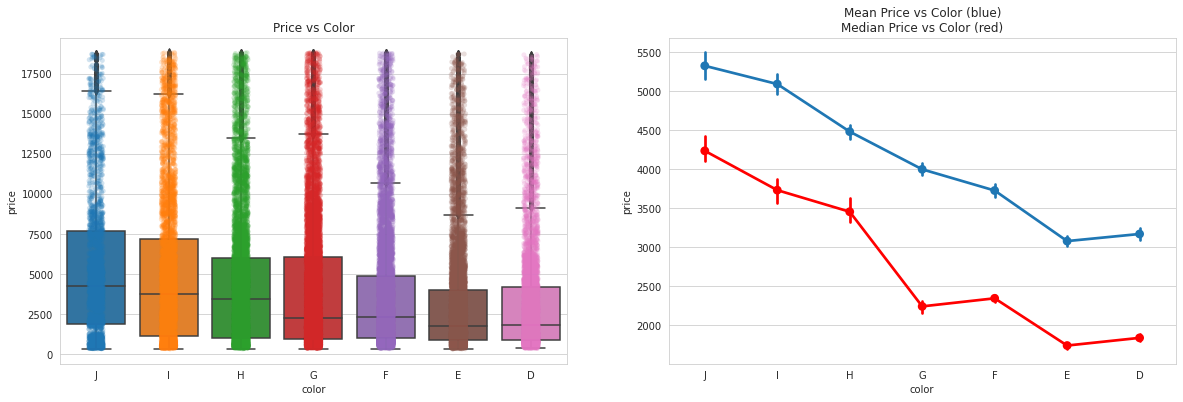

In [ ]:
# boxplot, stripplot, pointplot color và price
figure, ax = plt.subplots(ncols=2, figsize=(20, 6))
sns.boxplot(data=data, x='color', y='price', ax=ax[0])
sns.stripplot(data=data, x='color', y='price', size=5, alpha=0.2, ax=ax[0])
sns.pointplot(data=data, x='color', y='price', ax=ax[1])
sns.pointplot(data=data, x='color', y='price', ax=ax[1], estimator=np.median, color='r')
ax[0].set_title("Price vs Color")
ax[1].set_title("Mean Price vs Color (blue)\nMedian Price vs Color (red)")
plt.show()

* Màu loại J, I, H, G có số lượng ngoại lệ ít hơn so với F, E và D. Nó cho thấy rằng hầu như chất lượng màu càng tốt thì ngoại lệ càng cao 
* Mỗi loại màu có cùng mức giá thấp nhất và mức giá của ngoại lệ cao nhất
* Mặc dù loại màu tốt nhất là E và D, nhưng giá trung bình của nó hầu như là thấp nhất, còn J, I, H, lại cao hơn trong khi đó là các màu kém hơn 
* Kim cương có giá trung bình đắt nhất thường tập trung ở màu J và I
* Color không đủ phù hợp để giải thích sự thay đổi giá của kim cương, vì vậy khi so sánh cần kết hợp thêm các yếu tố khác

**clarity and price**

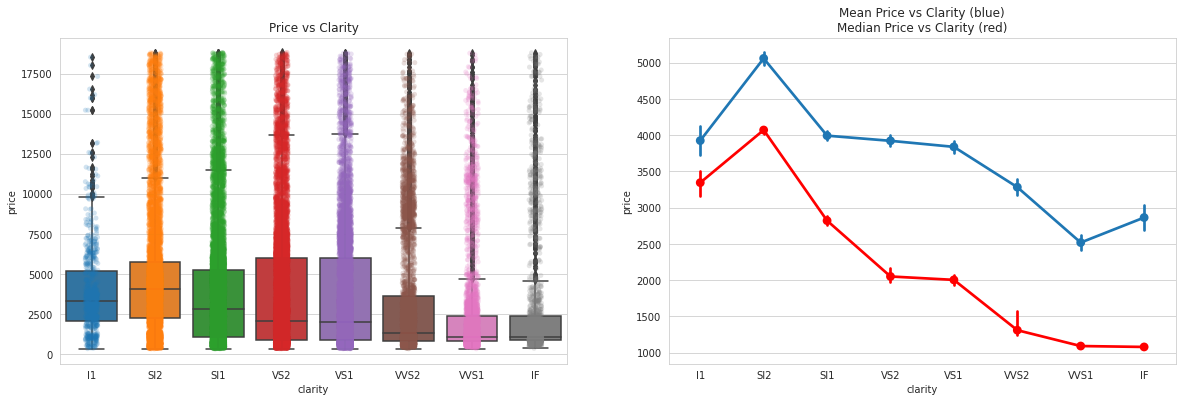

In [ ]:
# boxplot, stripplot, pointplot clarity và price
figure, ax = plt.subplots(ncols=2, figsize=(20, 6))
sns.boxplot(data=data, x='clarity', y='price', ax=ax[0])
sns.stripplot(data=data, x='clarity', y='price', size=5, alpha=0.2, ax=ax[0])
sns.pointplot(data=data, x='clarity', y='price', ax=ax[1])
sns.pointplot(data=data, x='clarity', y='price', ax=ax[1], estimator=np.median, color='r')
ax[0].set_title("Price vs Clarity")
ax[1].set_title("Mean Price vs Clarity (blue)\nMedian Price vs Clarity (red)")
plt.show()

* IF, VVS1 và VVS2 có số lượng ngoại lệ cao so với các loại khác
* Mỗi loại đều có cùng mức giá thấp nhất và mức giá của ngoại lệ cao nhất
* Phần lớn kim cương tập trung ở SI2, SI1, VS2 và VS1
* Ở I1 và SI2 kim cương có giá trung bình cao nhất dù là 2 màu kém nhất
* VVS1 và IF là 2 màu tốt nhất nhưng lại có giá trung bình thấp nhất
* Clarity không đủ phù hợp để giải thích sự thay đổi giá của kim cương, vì vậy khi so sánh cần kết hợp thêm các yếu tố khác

### explore numerics

**carat and price**

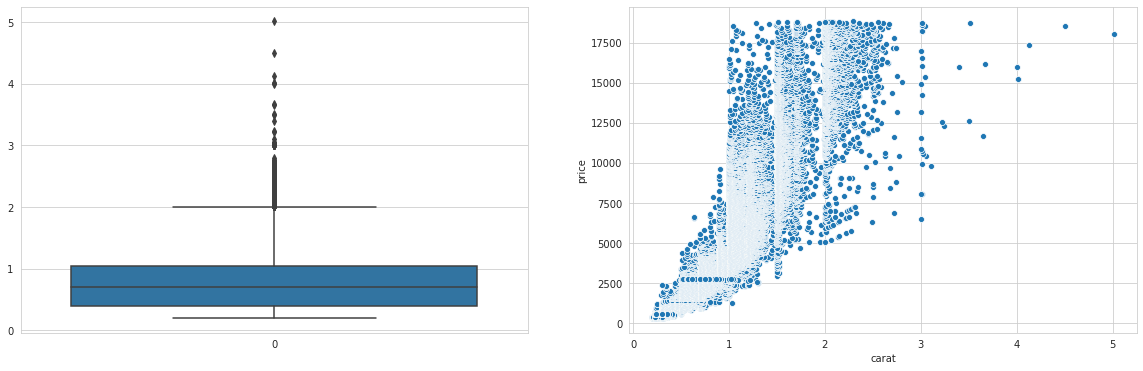

In [ ]:
#boxplot, scatterplot carat và price
figure, ax = plt.subplots(ncols=2, figsize=(20, 6))
sns.boxplot(data=data.carat, ax=ax[0])
sns.scatterplot(data=data, x='carat', y='price', ax=ax[1])
plt.show()

* Các viên kim cương có carat chủ yếu từ 0.3 đến 1.1
* carat là đặc trưng ảnh hưởng đáng kể đến price
* Phần lớn các viên kim cương có giá cao nhất có carat từ 1 đến 2.6
* Các viên có carat từ 3 trở lên xuất hiện ít hơn và đắt hơn
* Các viên có cùng carat có mức giá khác khác nhau có thể còn phụ thuộc vào các yếu tố khác
* Quan hệ giữa carat và price dường như là phi tuyến

**add log_price column**

In [ ]:
data['log_price'] = data.price.apply(np.log)

<AxesSubplot:xlabel='carat', ylabel='log_price'>

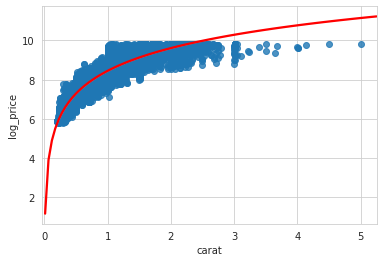

In [ ]:
# regplot
sns.regplot(data=data, x='carat', y='log_price', logx=True, line_kws={"color": "red"})

**depth and price**

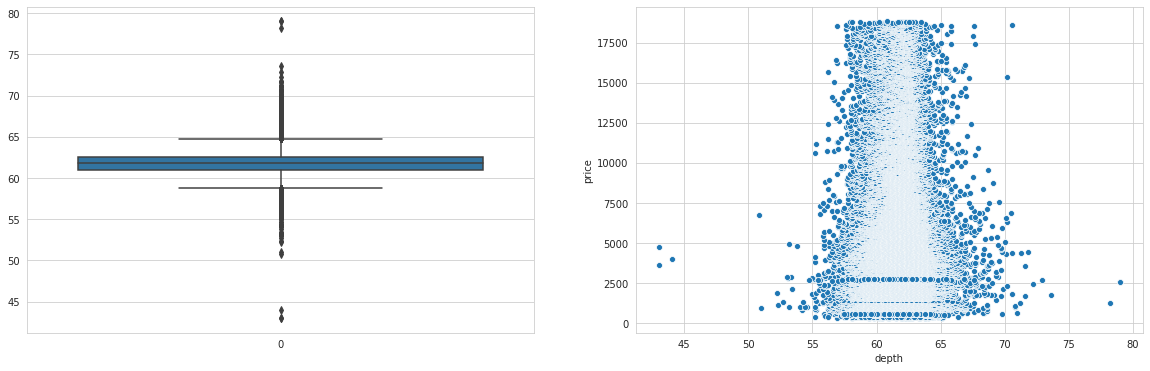

In [ ]:
#boxplot, scatterplot depth và price
figure, ax = plt.subplots(ncols=2, figsize=(20, 6))
sns.boxplot(data=data.depth, ax=ax[0])
sns.scatterplot(data=data, x='depth', y='price', ax=ax[1])
plt.show()

* depth có phân bố khá hẹp với khoảng biến thiên từ khoảng 61 đến 63
* Ngoại lệ xuất hiện ở cả hai bên phân bố
* Mối quan hệ giữa depth và price không thể hiện rõ ràng lắm

**table and price**

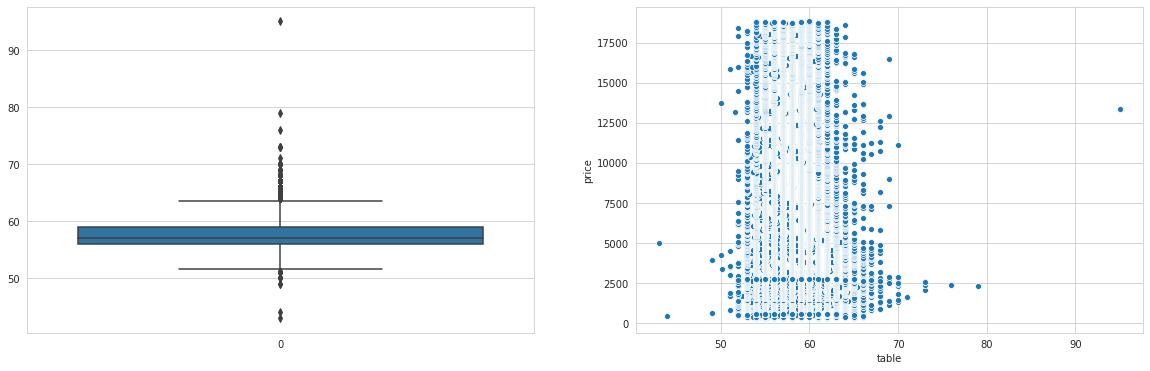

In [ ]:
#boxplot, scatterplot table và price
figure, ax = plt.subplots(ncols=2, figsize=(20, 6))
sns.boxplot(data=data.table, ax=ax[0])
sns.scatterplot(data=data, x='table', y='price', ax=ax[1])
plt.show()

* table có phân bố khá hẹp với khoảng biến thiên từ khoảng 56 đến 59
* Ngoại lệ xuất hiện ở cả hai bên phân bố
* Giống với depth, mối quan hệ giữa table và price không thể hiện rõ ràng lắm

**price**

<AxesSubplot:xlabel='price'>

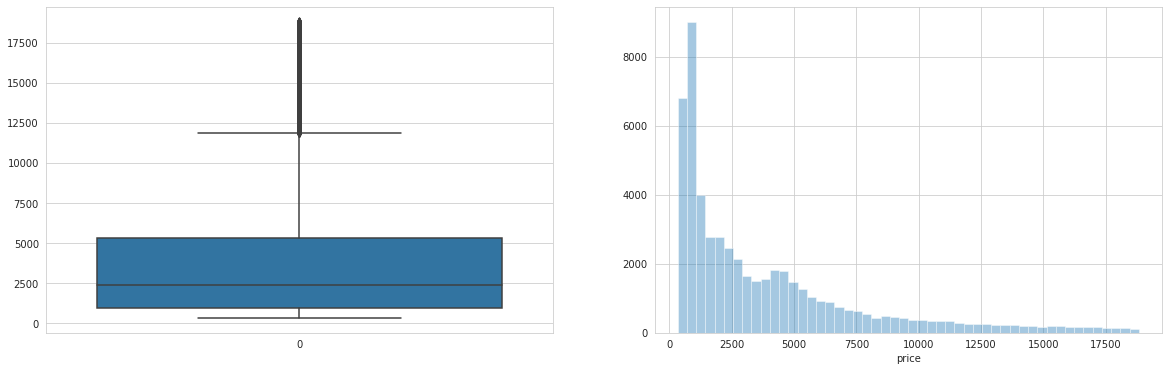

In [ ]:
# boxplot, distplot price
figure, ax = plt.subplots(ncols=2, figsize=(20, 6))
sns.boxplot(data=data.price, ax=ax[0])
sns.distplot(data.price, kde = False, ax=ax[1])

* price tập trung nhiều ở khoảng từ 300 đến 5000
* Có nhiều giá trị ngoại lệ nằm rất xa ở bên trên, cho thấy có nhiều viên kim cương có giá cao bất thường
* price có phân bố lệch phải

**x, y, z and price**

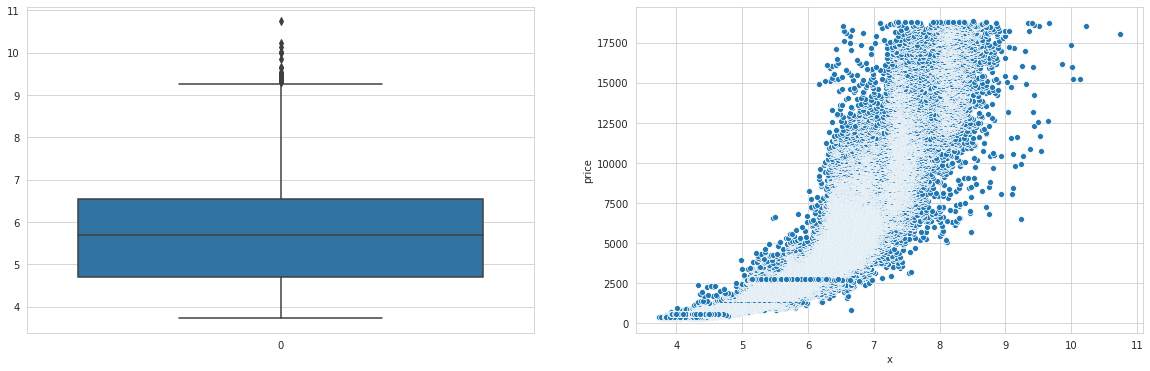

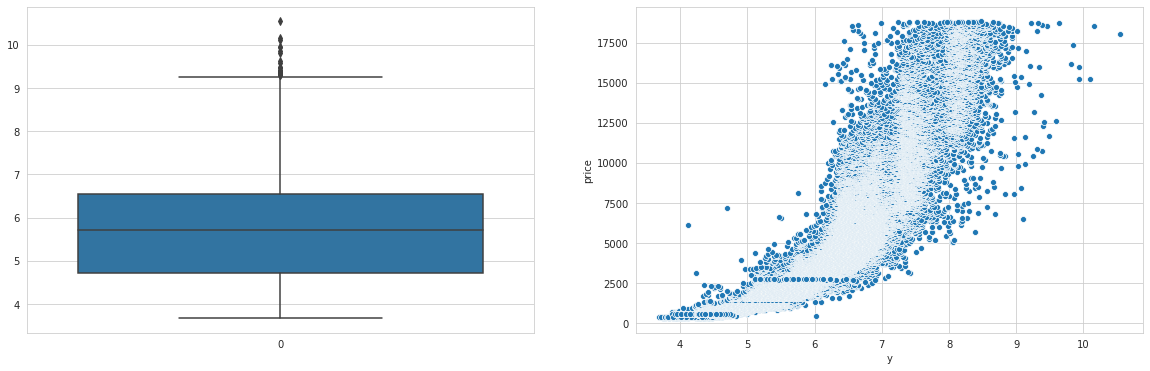

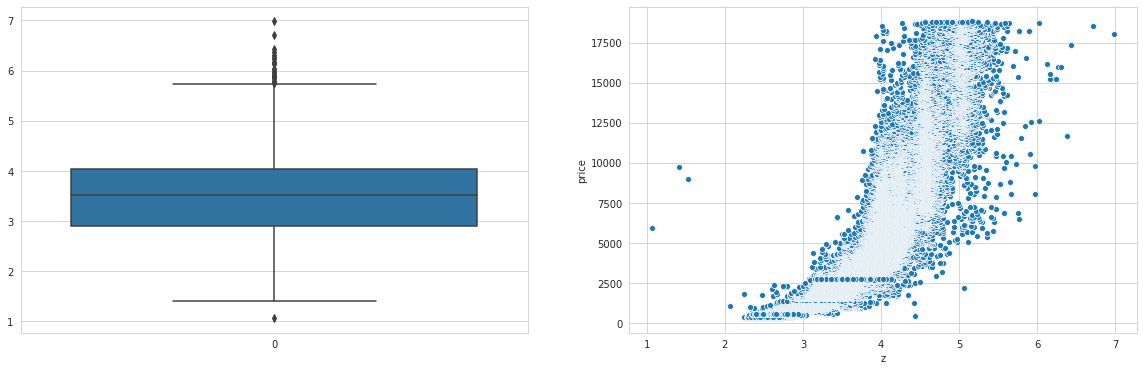

In [ ]:
#boxplot, scatterplot x, y, z và price
figure, ax = plt.subplots(ncols=2, figsize=(20, 6))
sns.boxplot(data=data.x, ax=ax[0])
sns.scatterplot(data=data, x='x', y='price', ax=ax[1])
plt.show()

figure, ax = plt.subplots(ncols=2, figsize=(20, 6))
sns.boxplot(data=data.y, ax=ax[0])
sns.scatterplot(data=data, x='y', y='price', ax=ax[1])
plt.show()

figure, ax = plt.subplots(ncols=2, figsize=(20, 6))
sns.boxplot(data=data.z, ax=ax[0])
sns.scatterplot(data=data, x='z', y='price', ax=ax[1])
plt.show()

* x tập trung nhiều ở khoảng từ 4.7 đến 6.6
* y tập trung nhiều ở khoảng từ 4.8 đến 6.6
* z tập trung nhiều ở khoảng từ 2.9 đến 4
* x, y, z có số lượng ngoại lệ gần như nhau
* x, y, z đều có ảnh hưởng đáng kể đến price
* Mối quan hệ gần như là phi tuyến

**correlation of numerics**

<AxesSubplot:>

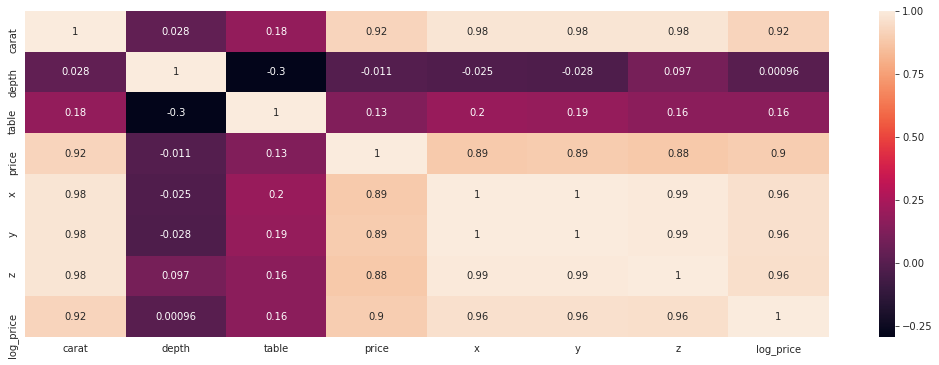

In [ ]:
# heatmap
corr = data.corr()
figure, ax = plt.subplots(figsize=(18,6))
sns.heatmap(data=corr, annot=True)

* price có mối tương quan mạnh với carat, x, y, z
* carat có ảnh hưởng đáng kể đến price
* x, y, z ảnh hưởng mạnh với nhau và với price
* depth và table có mối tương quan khá thấp với price

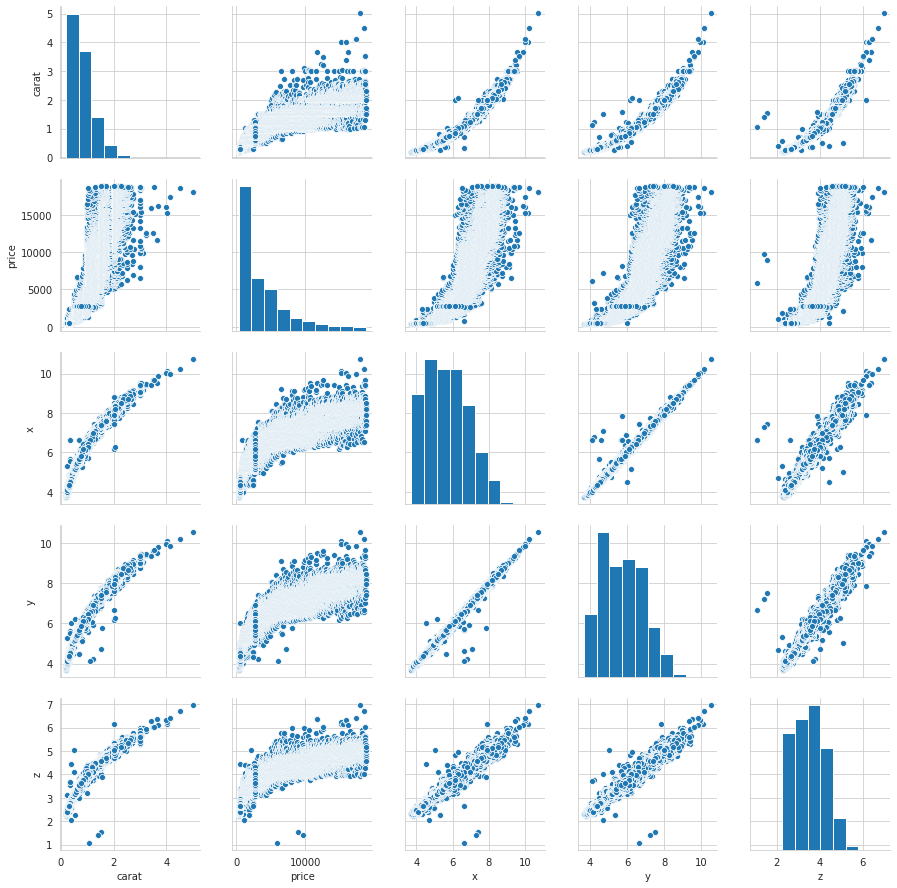

In [ ]:
#pairplot
sns.pairplot(data, vars=['carat', 'price', 'x', 'y', 'z'])

* carat, x, y, z: nhìn chung có phân bố lệch phải, có mối quan hệ gần như là phi tuyến tính với price
* price có phân bố lệch phải
* Giá trị trung bình của các đặc trưng thường lớn hơn giá trị trung vị (median)
* x, y, z có mối quan hệ gần như là tuyến tính với nhau và phi tuyến tính với carat. Các viên kim cương có x, y, z càng lớn thì carat cũng càng lớn

### combine categories and numerics

**Price vs Carat Grouped by Cut**

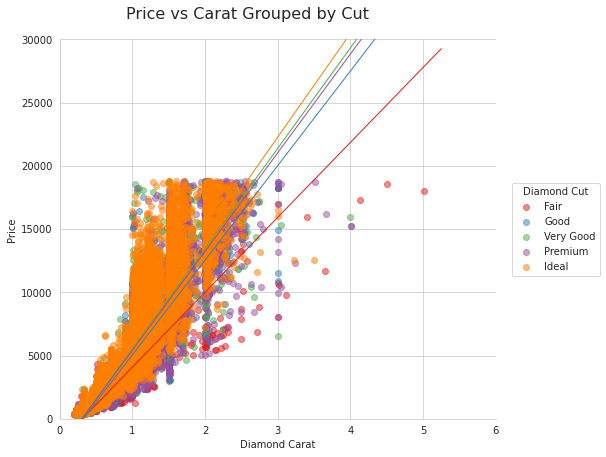

In [ ]:
# lmplot
sns.set_style("whitegrid")
g = sns.lmplot(x="carat", y="price", hue="cut", data=data, 
               palette="Set1", scatter_kws={"alpha": 0.5}, legend=False, 
               height=6, aspect=1.2, ci=None, scatter=True, line_kws={"linewidth":1})
g.set(ylim=(0, 30000))
g.set(xlim=(0, 6))
g.fig.suptitle("Price vs Carat Grouped by Cut", y=1.05, fontsize=16)
g.set_axis_labels("Diamond Carat", "Price")
g.ax.legend(title="Diamond Cut", loc='center right', bbox_to_anchor=(1.25, 0.5))

**Log Price vs Carat Grouped by Cut**

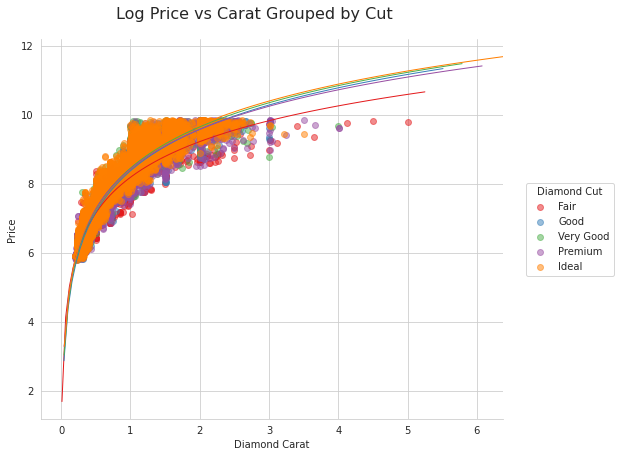

In [ ]:
# lmplot
sns.set_style("whitegrid")
g = sns.lmplot(x="carat", y="log_price", hue="cut", data=data, 
               palette="Set1", scatter_kws={"alpha": 0.5}, legend=False, logx=True,
               height=6, aspect=1.2, ci=None, scatter=True, line_kws={"linewidth":1})
g.fig.suptitle("Log Price vs Carat Grouped by Cut", y=1.05, fontsize=16)
g.set_axis_labels("Diamond Carat", "Price")
g.ax.legend(title="Diamond Cut", loc='center right', bbox_to_anchor=(1.25, 0.5))

* Khi so sánh những viên kim cương có carat bằng nhau, kim cương có giá gần như tăng dần theo cut, loại cut Ideal hầu như là đắt nhất

**Price vs Carat Grouped by Color**

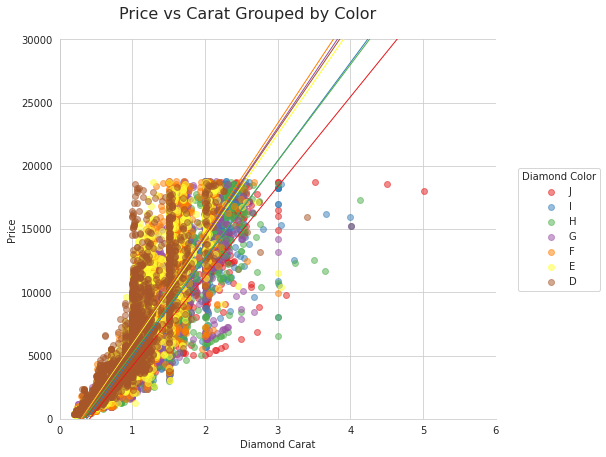

In [ ]:
# lmplot
sns.set_style("whitegrid")
g = sns.lmplot(x="carat", y="price", hue="color", data=data, 
               palette="Set1", scatter_kws={"alpha": 0.5}, legend=False, 
               height=6, aspect=1.2, ci=None, scatter=True, line_kws={"linewidth":1})
g.set(ylim=(0, 30000))
g.set(xlim=(0, 6))
g.fig.suptitle("Price vs Carat Grouped by Color", y=1.05, fontsize=16)
g.set_axis_labels("Diamond Carat", "Price")
g.ax.legend(title="Diamond Color", loc='center right', bbox_to_anchor=(1.25, 0.5))

**Log Price vs Carat Grouped by Color**

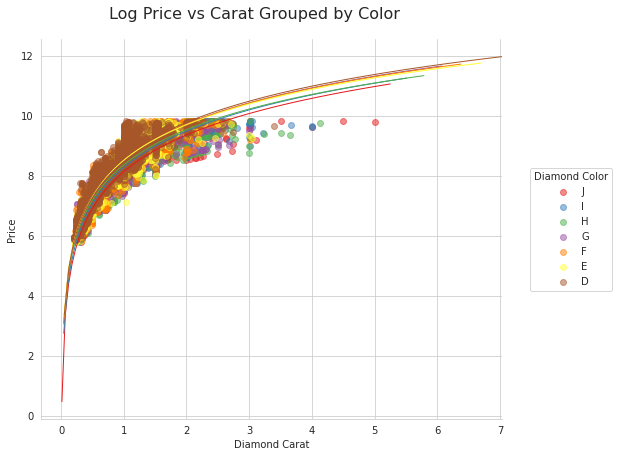

In [ ]:
# lmplot
sns.set_style("whitegrid")
g = sns.lmplot(x="carat", y="log_price", hue="color", data=data, 
               palette="Set1", scatter_kws={"alpha": 0.5}, legend=False, logx=True,
               height=6, aspect=1.2, ci=None, scatter=True, line_kws={"linewidth":1})
g.fig.suptitle("Log Price vs Carat Grouped by Color", y=1.05, fontsize=16)
g.set_axis_labels("Diamond Carat", "Price")
g.ax.legend(title="Diamond Color", loc='center right', bbox_to_anchor=(1.25, 0.5))

* Khi so sánh những viên kim cương carat bằng nhau, giá của kim cương gần như tăng dần theo màu, nhóm màu D hầu như đắt nhất

**Price vs Carat Grouped by Clarity**

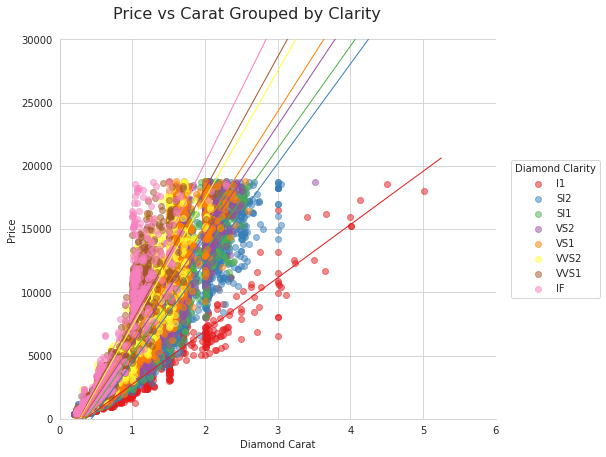

In [ ]:
# lmplot
sns.set_style("whitegrid")
g = sns.lmplot(x="carat", y="price", hue="clarity", data=data, 
               palette="Set1", scatter_kws={"alpha": 0.5}, legend=False, 
               height=6, aspect=1.2, ci=None, scatter=True, line_kws={"linewidth":1})
g.set(ylim=(0, 30000))
g.set(xlim=(0, 6))
g.fig.suptitle("Price vs Carat Grouped by Clarity", y=1.05, fontsize=16)
g.set_axis_labels("Diamond Carat", "Price")
g.ax.legend(title="Diamond Clarity", loc='center right', bbox_to_anchor=(1.25, 0.5))

**Log Price vs Carat Grouped by Clarity**

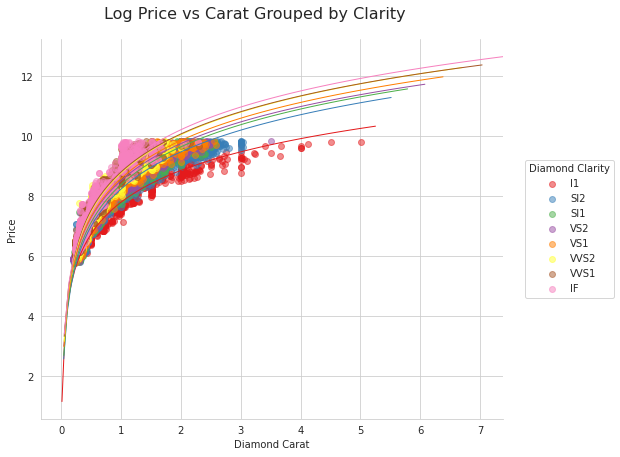

In [ ]:
# lmplot
sns.set_style("whitegrid")
g = sns.lmplot(x="carat", y="log_price", hue="clarity", data=data, 
               palette="Set1", scatter_kws={"alpha": 0.5}, legend=False, logx=True,
               height=6, aspect=1.2, ci=None, scatter=True, line_kws={"linewidth":1})
g.fig.suptitle("Log Price vs Carat Grouped by Clarity", y=1.05, fontsize=16)
g.set_axis_labels("Diamond Carat", "Price")
g.ax.legend(title="Diamond Clarity", loc='center right', bbox_to_anchor=(1.25, 0.5))

* Khi so sánh những viên kim cương có carat bằng nhau, giá của kim cương gần như tăng dần theo độ trong, loại có độ trong IF hầu như là đắt nhất
* Những viên kim cương có carat từ 2 trở lên ít khi có clarity là IF

### conclusion

**Giá của kim cương chịu ảnh hưởng mạnh bởi carat, cut, color, clarity, x, y, z, trong đó mạnh nhất là carat**

**Viên kim cương có kích thước càng lớn thì giá càng cao, cũng như là hiếm hơn**

**cut, color, clarity khi xét riêng thì gần như không phù hợp để xác định và so sánh giá kim cương. Thay vào đó, nên kết hợp chúng với các đặc trưng khác như carat**

**Ngoài ra, đa số giá kim cương ở khoảng từ 300 đến 5000, có thể đây là mức giá mà nhiều người dùng sẵn sàng bỏ ra để sở hữu một viên kim cương**